In [1]:
import pandas as pd

In [10]:
df=pd.read_parquet('staging/url/transformed.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wiki_id  424 non-null    object
 1   url      271 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


,wiki_id,url
0,Q43436,https://en.wikipedia.org/wiki/Pearl
1,Q43088,https://en.wikipedia.org/wiki/Ruby
2,Q43513,https://en.wikipedia.org/wiki/Emerald
3,Q5283,https://en.wikipedia.org/wiki/Diamond
4,Q4700957,https://en.wikipedia.org/wiki/Aqeeq


In [11]:
import requests
from bs4 import BeautifulSoup
def page_from_url(url = "https://en.wikipedia.org/wiki/Ruby"):
    # Define the URL of the Wikipedia page
    
    
    # Send a request to fetch the page content
    response = requests.get(url)
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    h1_title = soup.find('h1').get_text()
    # Extract the main content of the page (text within the <p> tags)
    paragraphs = soup.find_all('p')
    
    # Concatenate the text from all paragraphs
    page_text = '\n'.join([para.get_text() for para in paragraphs])
    if page_text is not None:
        return h1_title+page_text
    raise Exception(f"Page {title} does not exist.")

text_from_url()[:300]

'Ruby\n\nRuby is a pinkish red to blood-red colored gemstone, a variety of the mineral corundum (aluminium oxide). Ruby is one of the most popular traditional jewelry gems and is very durable. Other varieties of gem-quality corundum are called sapphires. Ruby is one of the traditional cardinal gems, al'

In [29]:
from monadsquishy import Squishy, sf
sq_config = {
    'transformations':[
        {
            'input_table': df,
            'transformed_path':'./staging/page',
            'exploded_path':'./staging/page',
            'out_columns': {
                 'wiki_id': {
                     'input':'wiki_id',
                     'funcs':[lambda x:x, ],
                 },
                 'url': {
                     'input':'url',
                     'funcs':[lambda x:x, ],
                 },
                 'page': {
                     'input':'url',
                     'funcs':[page_from_url, ],
                 },
             }
        }
    ]
}
sq=Squishy(sq_config)
sq.run()

1/3 Output: wiki_id
Input: wiki_id              -->['<lambda>']                                                                                                                                                                                            


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 167550.87it/s]


2/3 Output: url
Input: url                  -->['<lambda>']                                                                                                                                                                                            


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 151778.18it/s]


3/3 Output: page
Input: url                  -->['page_from_url']                                                                                                                                                                                       


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [02:51<00:00,  2.47it/s]

>> Finished transformations!


In [30]:
sq.clean_report()

,input_column,output_column,message,clean_count
2,wiki_id,wiki_id,Passed: <lambda>(),424
1,url,url,Passed: <lambda>(),424
0,url,page,Passed: page_from_url(),271


In [31]:
sq.output()

,wiki_id,url,page
0,Q43436,https://en.wikipedia.org/wiki/Pearl,"Pearl\n\nA pearl is a hard, glistening object ..."
1,Q43088,https://en.wikipedia.org/wiki/Ruby,Ruby\n\nRuby is a pinkish red to blood-red col...
2,Q43513,https://en.wikipedia.org/wiki/Emerald,Emerald\n\nEmerald is a gemstone and a variety...
3,Q5283,https://en.wikipedia.org/wiki/Diamond,Diamond\n\nDiamond is a solid form of the elem...
4,Q4700957,https://en.wikipedia.org/wiki/Aqeeq,"AqeeqAqeeq, akik or aqiq (Arabic: العقيق) mean..."
...,...,...,...
419,Q59922524,None,None
420,Q47458415,None,None
421,Q88789639,None,None
422,Q113921884,None,None


In [32]:
df_page=pd.read_parquet('staging/page/transformed.parquet')
df_page.info()
df_page.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wiki_id  424 non-null    object
 1   url      271 non-null    object
 2   page     271 non-null    object
dtypes: object(3)
memory usage: 10.1+ KB


,wiki_id,url,page
0,Q43436,https://en.wikipedia.org/wiki/Pearl,"Pearl\n\nA pearl is a hard, glistening object ..."
1,Q43088,https://en.wikipedia.org/wiki/Ruby,Ruby\n\nRuby is a pinkish red to blood-red col...
2,Q43513,https://en.wikipedia.org/wiki/Emerald,Emerald\n\nEmerald is a gemstone and a variety...
3,Q5283,https://en.wikipedia.org/wiki/Diamond,Diamond\n\nDiamond is a solid form of the elem...
4,Q4700957,https://en.wikipedia.org/wiki/Aqeeq,"AqeeqAqeeq, akik or aqiq (Arabic: العقيق) mean..."


In [33]:
sq_config = {
    'transformations':[
        {
            'input_table': df_page,
            'transformed_path':'./staging/text',
            'exploded_path':'./staging/text',
            'out_columns': {
                 'wiki_id': {
                     'input':'wiki_id',
                     'funcs':[lambda x:x, ],
                 },
                 'url': {
                     'input':'url',
                     'funcs':[lambda x:x, ],
                 },
                 'page': {
                     'input':'page',
                     'funcs':[lambda x:x, ],
                 },
                'len_text': {
                     'input':'page',
                     'funcs':[lambda x:len(x), ],
                 },
             }
        }
    ]
}
sq=Squishy(sq_config)
sq.run()

1/4 Output: wiki_id
Input: wiki_id              -->['<lambda>']                                                                                                                                                                                            


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 118844.22it/s]


2/4 Output: url
Input: url                  -->['<lambda>']                                                                                                                                                                                            


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 127519.35it/s]


3/4 Output: page
Input: page                 -->['<lambda>']                                                                                                                                                                                            


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 278089.90it/s]


4/4 Output: len_text
Input: page                 -->['<lambda>']                                                                                                                                                                                            


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 310580.67it/s]

>> Finished transformations!


In [36]:
df_text=sq.output()
df_text.info()
df_text.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wiki_id   424 non-null    object 
 1   url       271 non-null    object 
 2   page      271 non-null    object 
 3   len_text  271 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.4+ KB


,wiki_id,url,page,len_text
0,Q43436,https://en.wikipedia.org/wiki/Pearl,"Pearl\n\nA pearl is a hard, glistening object ...",38359.0
1,Q43088,https://en.wikipedia.org/wiki/Ruby,Ruby\n\nRuby is a pinkish red to blood-red col...,13666.0
2,Q43513,https://en.wikipedia.org/wiki/Emerald,Emerald\n\nEmerald is a gemstone and a variety...,11181.0
3,Q5283,https://en.wikipedia.org/wiki/Diamond,Diamond\n\nDiamond is a solid form of the elem...,61340.0
4,Q4700957,https://en.wikipedia.org/wiki/Aqeeq,"AqeeqAqeeq, akik or aqiq (Arabic: العقيق) mean...",1035.0


In [37]:
df_text.describe()

,len_text
count,271.000000
mean,18731.837638
std,23811.319936
min,35.000000
25%,2723.000000
50%,7963.000000
75%,25225.000000
max,117874.000000


array([[<Axes: title={'center': 'len_text'}>]], dtype=object)

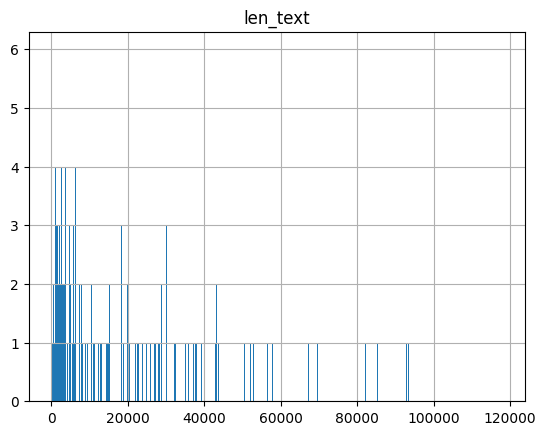

In [41]:
df_text[['len_text']].hist(bins=1000)

In [51]:
df_text.sort_values('len_text',ascending=True).head(50)

,wiki_id,url,page,len_text
213,Q226841,https://en.wikipedia.org/wiki/Invincible,InvincibleInvincible may refer to:\n,35.0
393,Q16155169,https://en.wikipedia.org/wiki/List_of_jeweller...,List of jewellery designers\nThis is a list of...,136.0
182,Q30673636,https://en.wikipedia.org/wiki/Chief_Engraver_o...,Chief Engraver of the Royal Mint\nChief Engrav...,180.0
301,Q2148649,https://en.wikipedia.org/wiki/Bon%C3%A4s,BonäsBonäs is a locality situated in Mora Muni...,221.0
8,Q5038632,https://en.wikipedia.org/wiki/Cardinal_gem,Cardinal gem\n\nCardinal gems are gemstones wh...,411.0
103,Q7148783,https://en.wikipedia.org/wiki/Patuxent_River_s...,Patuxent River stoneThe Patuxent River stone i...,530.0
221,Q723127,https://en.wikipedia.org/wiki/Native_element_m...,Native element mineralNative element minerals ...,538.0
66,Q10371097,https://en.wikipedia.org/wiki/Rough_diamond,Rough diamondA rough diamond is a diamond that...,546.0
46,Q7881230,https://en.wikipedia.org/wiki/Umba_sapphire,Umba sapphireThe Umba sapphire is a unique typ...,546.0
65,Q9164686,https://en.wikipedia.org/wiki/Ballas,BallasBallas (or shot bort) is a diamond indus...,550.0
